<p><img src="../IMAGES/Logo-UFCG.png" width="80" ></p>

# Introdução à Astrofísica e Cosmologia

## Estrelas e suas propriedades

**Luciano Barosi**

Olhamos para o céu noturno e muitas vezes reconhecemos padrões, imagens interessantes, mnemônicos para nos posicionar no universo, para localizar os objetos celestes.

Mas ao olharmos os objetos da *esfera celeste* todos parecem estar a uma mesma distância.

{-Graphics-, -Graphics-, -Graphics-, -Graphics-}
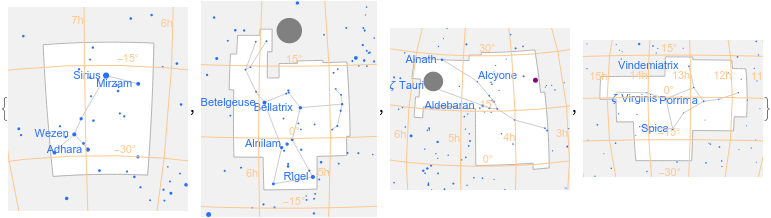

In [1]:
Entity["Constellation", #]["ConstellationGraphic"]& /@ {"CanisMajor", "Orion", "Taurus", "Virgo"}

### Distâncias Estelares

Distâncias de objetos celestes são muito difíceis de medir. As escalas de distância fogem a nossa compreensão e precisamos utilizar diversas técnicas.

Para estrelas, o mais comum é utilizar a paralaxe, a variação da posição de um objeto quando observado por diferentes pontos de uma linha base conhecida.

Quanto maior a linha base, maior a distancia que podemos medir. A maior linha base que temos é o tamanho da órbita da Terra. Observamos o mesmo objeto em posições antípodas da órbita da Terra ao redor do Sol e uma simples análise de semelhança de triângulos pode nos dar a distância das estrelas.

Uma medida de distância útil em Astronomia é o **parsec (pc)** que é a distância de uma estrela cuja paralaxe é de 1 segundo de arco na linha de base de 1 unidade astronômica (UA).

Nessa unidade a distância de um objeto é dada por:
$$d = \frac{1}{p},$$

onde $d$ é a distância medida em parsecs e $p$ é o ângulo da paralaxe estelar em secundos de arco.

O Mathematica tem alguns catálogos de estrelas para consultar automaticamente. Estes dados vem de um longo catálogo estelar chamado Hipparco, uma missão de satélite para medir as distâncias de um grande número de estrelas. Infelizmente estas funções do Mathematica são Suuper lentas.

In [2]:
table1 = StarData[EntityClass["Star", {EntityProperty["Star", "DistanceFromEarth"] -> TakeSmallest[1000]}], 
{"DistanceFromEarth", "Parallax"}];


Dynamic[If[TrueQ[OptionValue[EntityFramework`Utilities`Private`iBatchDownlo\
 
>         ad, {}, ShowStatus]] && 
 
>      EntityFramework`Utilities`Private`frontEndAvailableQ[], 
 
>     Internal`LoadingPanel[OptionValue[EntityFramework`Utilities`Private`iBa\
 
>         tchDownload, {}, StatusText][EntityFramework`Utilities`Private`next\
 
>        $8412, 1000]]], Evaluator -> $ParentLink]EvaluationCell -> $Failed


-Graphics-
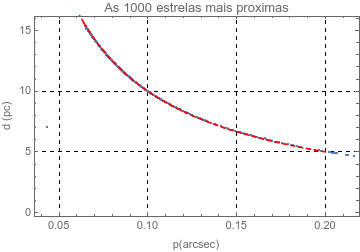

In [3]:
p1 = ListPlot[{QuantityMagnitude[#[[2]],"Arc Second"], QuantityMagnitude[#[[1]],"parsec"]} & /@ table1];
p2 = Plot[1/p, {p,0.01, .2}, PlotStyle-> {Red,Dashed}];
Show[p1,p2, Frame -> True, 
            GridLines->Automatic, 
            GridLinesStyle -> Directive[{Dashed}], 
            PlotLabel-> "As 1000 estrelas mais proximas", 
            FrameLabel-> {"p(arcsec)", "d (pc)"}]

### Brilho de Uma estrela

O brilho intrínseco de um objeto celeste é conhecido como **Luminosidade (L)**, corresponde a taxa na qual a estrela emite energina na forma de radiação eletromagnética. A Unidade de Luminosidade é a unidade de uma taxa de energia, ou seja **Watts (W)**. A luminosidade considera a radiação emitida em todos os comprimentos de onda e considera também uma média temporal, uma vez que a luminosidade sofre variações ao longo do tempo.

O Brilho aparente de um corpo celeste é conhecido como **fluxo (f)**. O fluxo é a taxa por unidade de área na qual a energia luminosa incide sobre uma superfície perpendicular aos raios de luz. O Fluxo mede a taxa de energia em uma área **coletora**, ou seja, uma área na Terra. Muito frequentemente o fluxo de um objeto é isotrópico, neste caso podemos escrever uma relação entre a luminosidade e o fluxo:

$$f = \frac{L}{4 \pi r^2} $$

Normalmente, medimos alguma grandeza relacionada ao fluxo e obtemos a Luminosidade após conhecermos a distância.


Dynamic[If[TrueQ[OptionValue[EntityFramework`Utilities`Private`iBatchDownlo\
 
>         ad, {}, ShowStatus]] && 
 
>      EntityFramework`Utilities`Private`frontEndAvailableQ[], 
 
>     Internal`LoadingPanel[OptionValue[EntityFramework`Utilities`Private`iBa\
 
>         tchDownload, {}, StatusText][EntityFramework`Utilities`Private`next\
 
>        $10187, 6]]], Evaluator -> $ParentLink]EvaluationCell -> $Failed


Sun                               Sirius
 
>    Rigel                                  Betelgeuse
 
>    Vega                                  Antares

       26                               28
3.83 10   watts                   1.4 10   watts
 
          31                                          31
>    4. 10   watts                          5.20333 10   watts
 
          28                                         31
>    2. 10   watts                         2.63811 10   watts

                                       1
1.000                             4. 10
 
           5
>    1.1 10                                 135928.
 
          1
>    5. 10                                 68916.1

          -6
4.84331 10   parsecs              2.6358 parsecs
 

>    266.872 parsecs                        196.906 parsecs
 

>    7.75243 parsecs                       186.91 parsecs

                                            -7
1363.88 watts per meter squared   1.65001 10   watts per meter squared
 
               -8                                     -7
>    4.90318 10   watts per meter squared   1.12164 10   watts per meter squared
 
              -8                                     -8
>    2.5362 10   watts per meter squared   6.31124 10   watts per meter squared
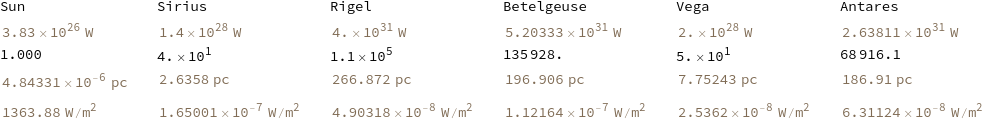

In [6]:
L0 = StarData["Sun","Luminosity"];
Stars = {"Sun","Sirius", "Rigel", "Betelgeuse", "Vega", "Antares"};
table2 = {#, StarData[#, {"Luminosity"}],StarData[#, {"Luminosity"}]/L0, StarData[#, {"DistanceFromEarth"}] }& @Stars; 
table2 = MapAt[UnitConvert[#,"Parsec"]&, table2, 4];
AppendTo[table2, (table2[[2]]//Flatten) /(4 Pi UnitConvert[table2[[4]]]^2)]//TableForm

O que medimos nos corpos celestes é uma definição de como eles parecem brilhantes quando observados no céu, isto é a **magnitude aparente**. Este é um conceito que foi inventado por Hipparco e classificava as estrelas que ele podia ver entr 0 e 6, sendo 6 a estrela mais apagada do céu.

Este sistema foi quantificado no século dezenove por meio de uma escala logarítmica. Observou-se que uma diferença de 5 magnitudes correspondia a uma diferença de 100 em fluxo.

$$m = C - 2.5 \log f $$

Onde $C$ é escolhido de forma que a estrela Vega tenha uma magnitude zero. $C = 2.5 \log f_{vega}$.

Esta magnitude considera apenas a luz que recebemos no espectro visível.

Definimos a **magnitude absoluta** como a magnitude de uma estrela quando colocada a uma distância de 10pc da Terra.

É fácil observar que

$$M = m - 5 \log d + 5, $$

onde $D$ deve ser medida em parsecs.

A partir desta expressão definimos o **Módulo de Distância**

$$ \mu = m - M = 5\log(\frac{d}{10\mathrm{pc}})$$

Sun      Sirius   Rigel   Betelgeuse   Vega    Antares

4.8      1.45     -6.95   -6.02        0.582   -5.28
-26.72   -1.44    0.18    0.45         0.03    1.06
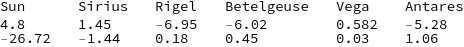

In [11]:
{#, StarData[#, {"AbsoluteMagnitude", "ApparentMagnitude"}]}& @ Stars//TableForm

### Temperatura de uma estrela

Estrelas nao sao monocromáticas, elas emitem energia em uma vasta faixa de comprimentos de onda, de forma que a radiância espectral para cada comprimento de onda pode ser definida por uma função $f(\lambda)$. O **fluxo total** de uma estrela é o **fluxo bolométrico**:

$$f = \int_0^\infty f(\lambda) \mathrm{d}\lambda. $$

Em geral não é possível medir o fluxo bolométrico de um objeto celeste, mas se for possível determiná-lo é possível associar uma **magnitude bolométrica**:


$$ m_{\mathrm{bol}} = C_{\mathrm{bol}} - 2.5 \log f_{\mathrm{bol}}, $$

sendo ainda necessário a determinação da constante. Após um longo debate, o valor convencional escolhido é aquele para o qual o Sol tenha $M_{\mathrm{bol}}=4.74$. 

Como muitas vezes não é possível obter o fluxo integrado, é usual em astronomia a utilização de um conjunto de filtros e a mensuração das magnitudes observadas por estes filtros. Os filtros convencionais são os **filtros de johnson** **U** (ultravioleta), **B** (azul), **V** (verde), **R** (vermelho), **I** (infravermelho).

Definimos assim os **índices de cor** das estrelas:

$$ B - V = m_B - m_B$$

e analogament para os índices $U-B$ e $V-R$.

Os índices de cor estão associados com a temperatura da superfície da estrela e portanto com a sua cor. A relação é dada por uma relação empírica:

$$T = \frac{8540 K}{(B-V) + 0.865}, $$

onde $T$ é chamada de **temperatura superficial** da estrela.

Existem também correções as magnitudes devido a interferência com a atmosfera e com o meio interestelar, sobre as quais não trataremos.

In [12]:
(*10000 estrelas mais próximas da Terra*)
table2 = StarData[EntityClass["Star",  {EntityProperty["Star", "DistanceFromEarth"] -> TakeSmallest[10000]}],
{"BVColorIndex", "AbsoluteMagnitude"}];

In [14]:
(*Esta é uma fórmula empírica diferente do texto acima *)
BVtoT[bv_]:=4600 (1/(0.92 bv + 1.7) + 1/(0.92 bv + 0.62))
(* Dados = MapAt[BVtoT[#]&, #,1]& /@ table2;*)

O diagrama abaixo é muito importante e vamos discutí-lo em mais detalhe posteriormente. A Magnitude absoluta traz uma informação sobre o fluxo da estrela e o índice de cor esta ligado a temperatura superficial. Vamos ver na próxima aula como isto nos permite compreender como as estrelas evoluem. 

-Graphics-
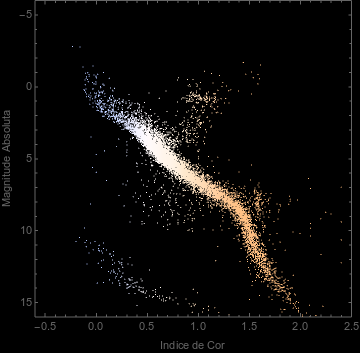

In [17]:
ListPlot[table2, 
    ScalingFunctions-> {Automatic, "Reverse"},
    FrameLabel -> {"Indice de Cor", "Magnitude Absoluta"},
    ColorFunction -> (ColorData["BlackBodySpectrum"][ BVtoT[#]]&), 
    {
    Frame -> True, 
    PlotRange -> {{-3/5, 2.5}, {-6, 16}}, 
    AspectRatio -> 1, 
    Axes -> None,
    ColorFunctionScaling -> False, 
    Background -> GrayLevel[0]}]

### Tamanho de uma Estrela

Associamos uma **Temperatura Efetiva** para as estrelas considerando a radiação delas como uma radiação de corpo negro. 

$$ T_\mathrm{eff} = \left(\frac{L}{4 \pi r^2 \sigma} \right), $$

onde $\sigma$ é a constante de Stefan-Boltzmann e $r$ é o **raio** da estrela.

In [18]:
star[{x_, temperatureK_, r_, name_, offset_}] := 
 Graphics3D[{ColorData["BlackBodySpectrum"][temperatureK], 
   Sphere[{x, 0, r}, r], Text[Style[name, {
GrayLevel[0.8], FontSize -> Scaled[0.03], 
      FontFamily -> "SourceSansPro"}], {x, 0, 2 r + offset}]}, {
  Boxed -> False, Axes -> False, Background -> GrayLevel[0], 
   Lighting -> {{"Ambient", 
GrayLevel[0.2]}, {"Directional", 
GrayLevel[1], 
ImageScaled[{0, 0, 1}]}}, SphericalRegion -> True, 
   ViewAngle -> 1/10 Pi, ViewPoint -> {0, -4, 0}}]

In [19]:
TemperatureRadiusName[stars_] := 
 {QuantityMagnitude[#[[1]], "Kelvins"],
  QuantityMagnitude[#[[2]], "Kilometers"],
  #[[3]] } & @ StarData[stars, {"EffectiveTemperature", "Radius", "Name"}]

In [20]:
StarLineup[stars_, vAngle_] :=
    Module[{colorsizedatalorsizedata, radii, horizontalPositionzontalPosition, positiontempradiusname},
    colorsizedata = TemperatureRadiusName /@ stars;
    radii = colorsizedata[[All, 2]];
    horizontalPosition = 2 Accumulate[radii] - radii;
    positiontempradiusname = Flatten /@Transpose@{horizontalPosition, colorsizedata, 
      Table[20000, Length[stars]]};
    Show[star /@ positiontempradiusname, ViewAngle -> vAngle, 
   PlotRange -> All]
  ]

-Graphics3D-
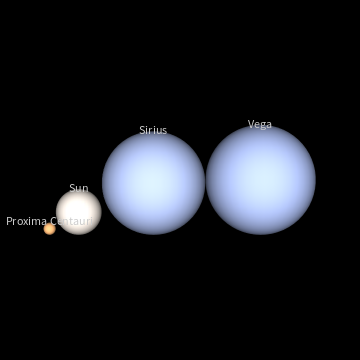

In [21]:
Stars = {"ProximaCentauri", "Sun","Sirius", "Vega"};
StarLineup[Stars, Pi/10]

### Massa de um Estrela

### Relações entre as Propriedades de uma estrela

As propriedades das estrelas são bastante correlacionadas e estas informações permitiram que conhecessemos informações sobre a dinâmica estelar.

### Massa x Luminosidade

In [23]:
(*Vamos utilizar o nosso Sol para padronizar as estrelas *)
{Msol, Lsol, Rsol} = StarData["Sun", {"Mass", "Luminosity", "Radius"}]

{           30          ,        26      ,         5           }
 1.988435 10   kilograms  3.83 10   watts  6.957 10  kilometers

In [25]:
(*A tabela resultante Dados é uma tabela sem unidades, estritamente numérica*)
table3 = StarData[
                EntityClass["Star", 
                            {"Mass" -> Quantity[ Interval[{0, 20*QuantityMagnitude[Msol]}],"Kilogram"]}],          
                {"Mass", "Luminosity", "EffectiveTemperature", "Radius"}];
Dados = {#[[1]]/Msol, #[[2]]/Lsol, QuantityMagnitude[#[[3]]], #[[4]]/Rsol}& /@ table3;

Existem várias relações entre as diferentes propriedades das estrelas. Elas informam para nós o estágio de evolução das estrelas e permitem nos informar sobre um modelo efetivo para o funcionamento das estrelas.

A maioria das estrelas tem uma relação de lei de potência entre as diferentes grandezas, algumas poucas estrelas ficam fora das "retas" no diagrama Log-Log.

-Graphics-
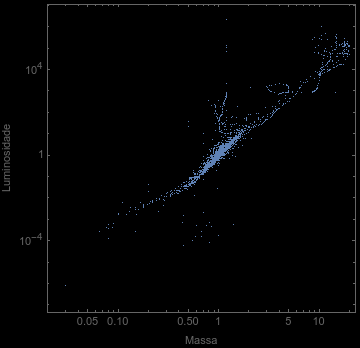

In [28]:
MLrelation = ListLogLogPlot[{#[[1]],#[[2]]}& /@ Dados, 
    FrameLabel -> {"Massa", "Luminosidade"},
    {
    Frame -> True, 
    AspectRatio -> 1, 
    Axes -> None,
    ColorFunctionScaling -> False, 
    Background -> GrayLevel[0]}]

Podemos separar as estrelas em três regimes, de pequena, média e grande massa.

In [29]:
lowMass = DeleteMissing[Select[Dados, Between[#[[1]],{0, 0.43}] &], 1,2];
midMass = DeleteMissing[Select[Dados, Between[#[[1]],{0.43, 2}] &], 1,2];
highMass = DeleteMissing[Select[Dados, Between[#[[1]],{2, 20}] &], 1,2];                       

Podemos fazer o ajuste linear em um espaço Log x Log e obter as leis de potência que determinam as relações.

In [32]:
data = {Log10[#[[1]]],Log10[#[[2]]]}& /@ QuantityMagnitude/@lowMass;
lm = LinearModelFit[data, x, x];
Llow = 10^(Normal[lm]/.x-> Log10[M]);
data = {Log10[#[[1]]],Log10[#[[2]]]}& /@ QuantityMagnitude/@midMass;
data = FindCluster[data]//First;
lm = LinearModelFit[data, x, x];
mlow = 10^(Normal[lm]/.x-> Log10[M]);
data = {Log10[#[[1]]],Log10[#[[2]]]}& /@ QuantityMagnitude/@highMass;
lm = LinearModelFit[data, x, x];
hlow = 10^(Normal[lm]/.x-> Log10[M]);

-Graphics-
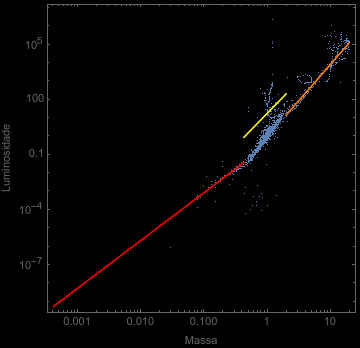

In [42]:
pLow = LogLogPlot[Llow/. M-> x,{x,0,0.43}, PlotStyle-> {Red}];
pMid = LogLogPlot[mlow /. M-> x,{x,0.43,2}, PlotStyle-> {Yellow}];
pHigh = LogLogPlot[hlow /. M-> x,{x,2,20}, PlotStyle-> {Orange}];
Show[MLrelation, pLow, pMid, pHigh, PlotRange-> All]

### Relação Massa x Raio

-Graphics-
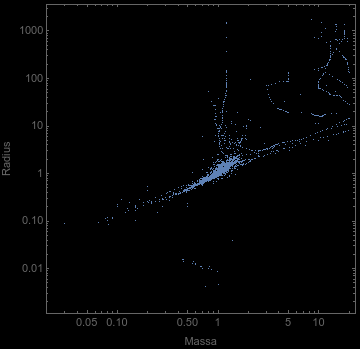

In [46]:
MLrelation = ListLogLogPlot[{#[[1]],#[[4]]}& /@ Dados, 
    FrameLabel -> {"Massa", "Radius"},
    {
    Frame -> True, 
    AspectRatio -> 1, 
    Axes -> None,
    ColorFunctionScaling -> False, 
    Background -> GrayLevel[0]}]

# Exercício 02

Observe o ajuste que fizemos para diferentes regiões do gráfico Massa x Luminosidade. Vemos que a faixa intermediária de massa não tem um ajuste de boa qualidade. Isto se deve a grande existência de outliers (pontos bem fora da curva). Tente pensar em um método de fazer este ajuste ignorando os outliers. Uma alternativa se chama ajuste **ajuste linear robusto**, e alguns métodos podem ser utilizados desta natureza, como o algoritmo RANSAC ou adaptações de programação linear.
**Este problema tem grau de dificuldade alto**

# Exercício 03

Separe os dados de estrelas no ponto 1.3 Massas solares. E Faça o ajuste mostrando que podemos observar duas retas distintas. Calcule os coeficientes e faça o gráfico dos pontos superpostos com os dois ajustes, da mesma forma como foi feito para a relação Massa x Luminosidade.

# Exercício 04

Uma estrela só tem a sua própria massa para funcionar como reserva de energia, portanto o combustível disponível é proporcional a $M$. A taxa em que o combustível é usado é proporcional a $L$, a luminosidade. O tempo de vida de uma estrela é proporcional a $\tau = M/L$. Escreva uma expressão para o tempo de vida de uma estrela em função de sua massa e faça um gráfico.

O que você pode concluir deste gráfico? Como varia o tempo de vida de uma estrela? Qual é a relação da Luminosidade com o tempo de vida?